In [1]:
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import numpy as np

In [2]:
cosmo = FlatLambdaCDM(70, 0.7)
cosmo

FlatLambdaCDM(H0=70 km / (Mpc s), Om0=0.7, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=None)

In [3]:
samp = pd.read_csv("lovoccs_southnorth_updated104_sz.csv")
samp

,name,MCXC,LoVoCCSID,ra,dec,redshift,L500,M500,R500,alt_name,...,RA,DEC,Redshift,Newly processed,Fully observed,Comments,XMM_R500_FRAC,CHANDRA_R500_FRAC,y500,log_y500
0,MCXCJ1510.9+0543,J1510.9+0543,1,227.729167,5.720000,0.0766,8.726709,7.2708,1.3344,A2029,...,227.73,5.72,0.0766,1.0,yes,"with A2033, southern infalling group",1.000000,1.000000,9.121234e-05,-4.039946
1,MCXCJ0258.9+1334,J0258.9+1334,2,44.739583,13.579444,0.0739,6.088643,5.8488,1.2421,RXCJ0258.9+1334,...,44.74,13.58,0.0739,1.0,yes,Bridge of galaxies between A401/A399 -- simila...,0.998862,1.000000,8.779498e-05,-4.056530
2,MCXCJ0041.8-0918,J0041.8-0918,4,10.458750,-9.301944,0.0555,5.100085,5.3163,1.2103,RXCJ0041.8-0918,...,10.46,-9.30,0.0555,1.0,yes,NaN,0.992639,1.000000,5.401241e-05,-4.267506
3,MCXCJ2201.9-5956,J2201.9-5956,6,330.483333,-59.949444,0.0980,4.204419,4.5890,1.1367,RXCJ2201.9-5956,...,330.48,-59.95,0.0980,1.0,yes,Currently using A3825 catalogs. Note the 2 clu...,1.000000,0.676043,5.306471e-05,-4.275194
4,MCXCJ0431.4-6126,J0431.4-6126,8,67.850417,-61.443889,0.0589,3.977333,4.5579,1.1485,RXCJ0431.4-6126,...,67.85,-61.44,0.0589,1.0,yes,NaN,1.000000,0.690575,7.921702e-05,-4.101181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,MCXCJ1332.9-2519,J1332.9-2519,113,203.232500,-25.323889,0.1199,1.139833,2.0385,0.8610,RXCJ1332.9-2519,...,203.23,-25.32,0.1199,1.0,yes,Not very clear lensing peak,0.000000,0.000000,1.792425e-06,-5.746559
100,MCXCJ0821.0+0751,J0821.0+0751,116,125.257500,7.866111,0.1100,1.110969,2.0211,0.8614,RXCJ0821.0+0751,...,125.26,7.87,0.1100,1.0,yes,NaN,1.000000,0.969115,3.381173e-06,-5.470933
101,MCXCJ2125.2-0657,J2125.2-0657,137,321.301667,-6.965556,0.1153,1.018847,1.9100,0.8438,RXCJ2125.2-0657,...,321.30,-6.97,0.1153,NaN,partially,NaN,0.000000,0.000000,7.583798e-06,-5.120113
102,MCXCJ1416.8-1158,J1416.8-1158,141,214.214583,-11.976111,0.0982,1.001648,1.9133,0.8491,RXCJ1416.8-1158,...,214.21,-11.98,0.0982,NaN,no,NaN,0.000000,0.864928,-5.208553e-09,NaN


In [4]:
und_obs_samp = samp[samp['XMM_R500_FRAC'] < 0.6]
fine_samp = samp[samp['XMM_R500_FRAC'] >= 0.6]
und_obs_samp

,name,MCXC,LoVoCCSID,ra,dec,redshift,L500,M500,R500,alt_name,...,RA,DEC,Redshift,Newly processed,Fully observed,Comments,XMM_R500_FRAC,CHANDRA_R500_FRAC,y500,log_y500
7,MCXCJ1347.4-3250,J1347.4-3250,11,206.868333,-32.849722,0.0391,3.819920,4.5067,1.1514,RXCJ1347.4-3250,...,206.87,-32.85,0.0391,1.0,yes,eRosita,0.510430,0.399690,4.819129e-05,-4.317031
12,MCXCJ0052.7-8015,J0052.7-8015,18,13.187083,-80.266389,0.1141,3.393306,3.9812,1.0783,RXCJ0052.7-8015,...,13.19,-80.27,0.1141,1.0,yes,NaN,0.000000,1.000000,9.630216e-06,-5.016364
21,MCXCJ1130.3-1434,J1130.3-1434,32,172.581250,-14.583056,0.1068,2.605129,3.4062,1.0262,RXCJ1130.3-1434,...,172.58,-14.58,0.1068,1.0,yes,NaN,0.386311,1.000000,2.606472e-05,-4.583947
45,MCXCJ2250.3+1054,J2250.3+1054,72,342.587500,10.902500,0.0768,1.558638,2.5431,0.9401,RXCJ2250.3+1054,...,342.59,10.90,0.0768,NaN,partially,,0.000000,1.000000,1.172151e-05,-4.931017
59,MCXCJ0028.6-2338,J0028.6-2338,91,7.163750,-23.637222,0.1120,1.404549,2.3285,0.9024,RXCJ0028.6-2338,...,7.16,-23.64,0.1120,NaN,partially,NaN,0.000000,0.000000,1.156233e-05,-4.936955
64,MCXCJ0912.4+1556,J0912.4+1556,98,138.124167,15.943056,0.0851,1.312476,2.2769,0.9037,A763,...,138.12,15.94,0.0851,1.0,yes,NaN,0.000000,0.990480,1.482459e-06,-5.829017
65,MCXCJ1516.5-0056,J1516.5-0056,99,229.141667,-0.948889,0.1198,1.296543,2.2053,0.8839,RXCJ1516.5-0056,...,229.14,0.95,0.1198,NaN,yes,Near A2050 (1 deg). Small BCG.,0.000000,0.000000,1.632856e-05,-4.787052
69,MCXCJ0212.8-4707,J0212.8-4707,111,33.224583,-47.132778,0.1150,1.162194,2.0701,0.8668,RXCJ0212.8-4707,...,33.22,-47.13,0.1150,NaN,partially,NaN,0.000000,0.869919,8.923251e-06,-5.049477
70,MCXCJ0107.8-3643,J0107.8-3643,112,16.954583,-36.727222,0.1186,1.156778,2.0589,0.8642,RXCJ0107.8-3643,...,16.95,-36.73,0.1186,NaN,partially,NaN,0.000000,0.000000,3.990630e-06,-5.398959
74,MCXCJ1027.9-0647,J1027.9-0647,119,156.998333,-6.796111,0.1176,1.095941,1.9936,0.8553,RXCJ1027.9-0647,...,157.00,-6.80,0.1176,1.0,yes,NaN,0.000000,0.000000,4.447253e-06,-5.351908


In [5]:
chosen_samp = samp[samp['LoVoCCSID'].isin([106, 119, 91, 112, 137, 142, 101, 111, 132, 69, 89, 32, 54, 18, 88, 68])]

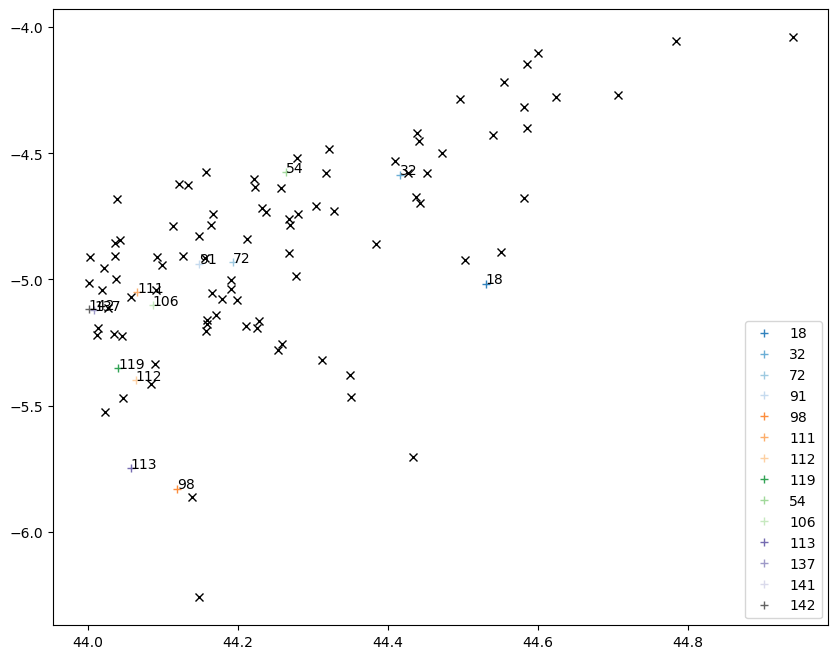

In [6]:
plt.figure(figsize=(10, 8))

ax = plt.gca()

col_cyc = iter(cm.tab20c(np.linspace(0, 1, len(und_obs_samp))))

plt.plot(np.log10(fine_samp['L500'].values*1e+44), fine_samp['log_y500'].values, 'x', color='black')
for row_ind, row in und_obs_samp.iterrows():
    if row['LoVoCCSID'] not in [11, 99, 134]:
        plt.plot(np.log10(row['L500']*1e+44), row['log_y500'], '+', label=row['LoVoCCSID'], color=next(col_cyc))
        ax.annotate(row['LoVoCCSID'], (np.log10(row['L500']*1e+44), row['log_y500']))
    else:
        plt.plot(np.log10(row['L500']*1e+44), row['log_y500'], 'x', color='black')


plt.legend(loc='best')
plt.show()

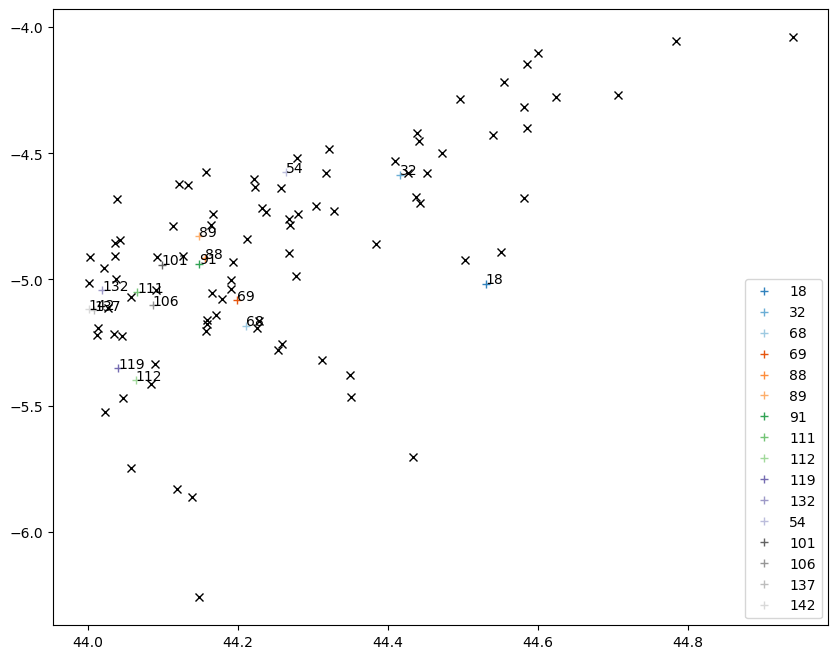

In [7]:
plt.figure(figsize=(10, 8))

ax = plt.gca()

col_cyc = iter(cm.tab20c(np.linspace(0, 1, len(chosen_samp))))

# plt.plot(np.log10(fine_samp['L500'].values*1e+44), fine_samp['log_y500'].values, 'x', color='black')
for row_ind, row in samp.iterrows():
    if row['LoVoCCSID'] in chosen_samp['LoVoCCSID'].values:
        plt.plot(np.log10(row['L500']*1e+44), row['log_y500'], '+', label=row['LoVoCCSID'], color=next(col_cyc))
        ax.annotate(row['LoVoCCSID'], (np.log10(row['L500']*1e+44), row['log_y500']))
    else:
        plt.plot(np.log10(row['L500']*1e+44), row['log_y500'], 'x', color='black')


plt.legend(loc='best')
plt.show()

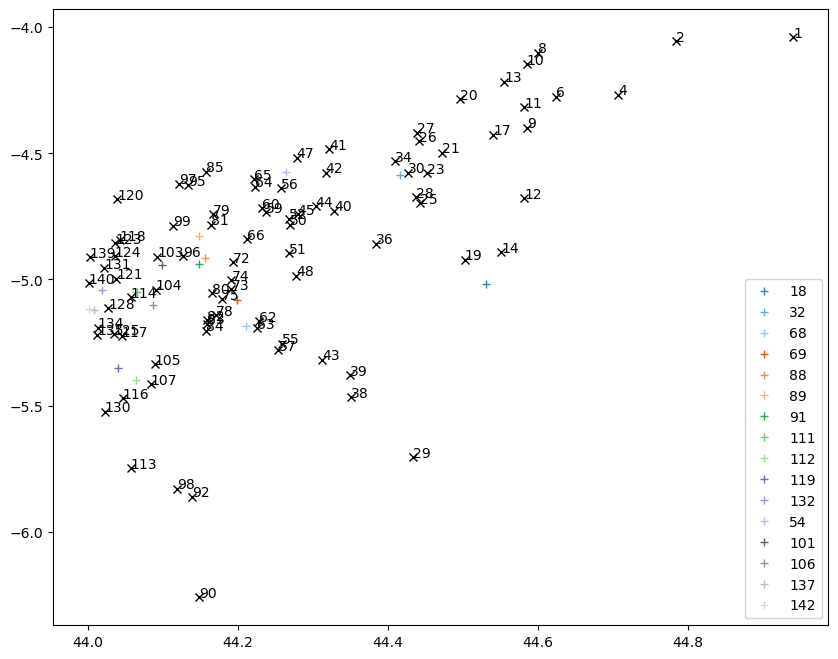

In [9]:
plt.figure(figsize=(10, 8))

ax = plt.gca()

col_cyc = iter(cm.tab20c(np.linspace(0, 1, len(chosen_samp))))

# plt.plot(np.log10(fine_samp['L500'].values*1e+44), fine_samp['log_y500'].values, 'x', color='black')
for row_ind, row in samp.iterrows():
    if row['LoVoCCSID'] in chosen_samp['LoVoCCSID'].values:
        plt.plot(np.log10(row['L500']*1e+44), row['log_y500'], '+', label=row['LoVoCCSID'], color=next(col_cyc))
#         ax.annotate(row['LoVoCCSID'], (np.log10(row['L500']*1e+44), row['log_y500']))
    else:
        plt.plot(np.log10(row['L500']*1e+44), row['log_y500'], 'x', color='black')
        ax.annotate(row['LoVoCCSID'], (np.log10(row['L500']*1e+44), row['log_y500']))
        


plt.legend(loc='best')
plt.show()

In [12]:
samp[samp['LoVoCCSID'] == 92]['y500'].values

array([1.37624111e-06])

In [13]:
samp[samp['LoVoCCSID'] == 92]

,name,MCXC,LoVoCCSID,ra,dec,redshift,L500,M500,R500,alt_name,...,RA,DEC,Redshift,Newly processed,Fully observed,Comments,XMM_R500_FRAC,CHANDRA_R500_FRAC,y500,log_y500
60,MCXCJ1244.6-1159,J1244.6-1159,92,191.158333,-11.985278,0.0963,1.375433,2.3246,0.9066,RXCJ1244.6-1159,...,191.16,-11.99,0.0963,NaN,yes,NaN,1.0,0.0,0.000001,-5.861305
